In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv('FTA_f.csv')
df.head()

,Top_Prob,Lower_1,Lower_2,Lower_3,Lower_4,Gate,Recommendation,total_redundancy
0,1.000000e-05,0.0100,0.0010,0.0010,0.0100,0,Add Redundancy,0.0220
1,1.000000e-09,0.1000,0.1000,0.0001,0.0001,0,Add Redundancy,0.2000
2,1.000000e-03,0.0001,0.0001,0.0001,0.0001,0,Over Redundant,0.0004
3,1.000000e-07,0.0001,0.1000,0.0001,0.0001,0,Add Redundancy,0.1000
4,1.000000e-07,0.1000,0.1000,0.0010,0.0001,0,Add Redundancy,0.2000


In [184]:
df.isnull().sum()

Top_Prob            0
Lower_1             0
Lower_2             0
Lower_3             0
Lower_4             0
Gate                0
Recommendation      0
total_redundancy    0
dtype: int64

Text(0, 0.5, 'Times')

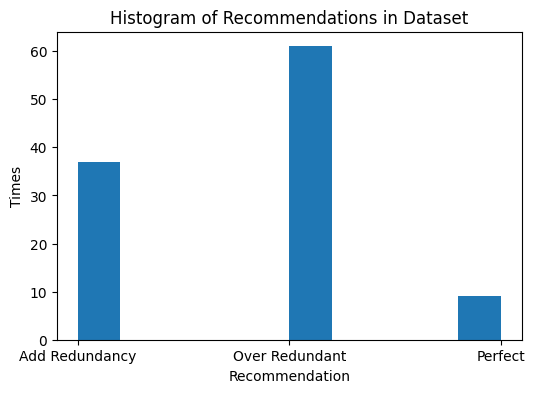

In [185]:
plt.figure(figsize=(6,4))
plt.hist(df.Recommendation)
plt.title('Histogram of Recommendations in Dataset')
plt.xlabel('Recommendation')
plt.ylabel('Times')

In [186]:
df.Lower_1.unique()

array([0.01  , 0.1   , 0.0001, 0.001 ])

In [187]:
dfn = df.drop(columns='total_redundancy')
dfn.head()

,Top_Prob,Lower_1,Lower_2,Lower_3,Lower_4,Gate,Recommendation
0,1.000000e-05,0.0100,0.0010,0.0010,0.0100,0,Add Redundancy
1,1.000000e-09,0.1000,0.1000,0.0001,0.0001,0,Add Redundancy
2,1.000000e-03,0.0001,0.0001,0.0001,0.0001,0,Over Redundant
3,1.000000e-07,0.0001,0.1000,0.0001,0.0001,0,Add Redundancy
4,1.000000e-07,0.1000,0.1000,0.0010,0.0001,0,Add Redundancy


In [188]:
y = dfn['Recommendation']
X = dfn.drop(columns='Recommendation')
y.shape, X.shape

((107,), (107, 6))

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((96, 6), (96,), (11, 6), (11,))

In [190]:
model = LogisticRegression()
model_2 = SVC(kernel='linear')
model_3 = DecisionTreeClassifier()

In [191]:
model.fit(X_train, y_train)
results = model.predict(X_test)
# model_2.fit(X_train, y_train)
# results_2 = model_2.predict(X_test)
# model_3.fit(X_train, y_train)
# results_3 = model_3.predict(X_test)

In [192]:
accuracy = accuracy_score(y_test, results)
print(accuracy)
# accuracy = accuracy_score(y_test, results_2)
# print(accuracy)
# accuracy = accuracy_score(y_test, results_3)
# print(accuracy)

0.8181818181818182


In [193]:
dft = {'Top_Prob': [0.0001], 'Lower_1': [0.0001], 'Lower_2': [0.0001], 'Lower_3': [0.0001], 'Lower_4': [0.0001], 'Gate': [1]}
dftt = pd.DataFrame(dft)
dftt.head()

,Top_Prob,Lower_1,Lower_2,Lower_3,Lower_4,Gate
0,0.0001,0.0001,0.0001,0.0001,0.0001,1


In [194]:
b0 = (dftt.Lower_1 + dftt.Lower_2 + dftt.Lower_3 + dftt.Lower_4)
b1 = (dftt.Lower_1 * dftt.Lower_2 * dftt.Lower_3 * dftt.Lower_4)
print(b0, b1)

0    0.0004
dtype: float64 0    1.000000e-16
dtype: float64


In [195]:
print(b1)
print(b0)

0    1.000000e-16
dtype: float64
0    0.0004
dtype: float64


In [196]:
a = dftt['Top_Prob'][0]
a

0.0001

In [197]:
def checker(a= a , b=0.0004):
    if a < b:
        print('Add Redundancy')
    elif a > b:
        print('Over Redundant')
    else:
        print("Perfect")

In [198]:
checker(b=.000000e-16)

Over Redundant


In [199]:
predictions = model.predict(dftt.values.reshape(1, -1))
# predictions_2 = model_2.predict(dftt.values.reshape(1, -1))
# predictions_3 = model_3.predict(dftt.values.reshape(1, -1))

c:\Users\New User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [200]:
predictions

array(['Over Redundant'], dtype=object)